In [5]:
## Robert Drey e Gabriel
import pandas as pd
import os

csv_directory = '.\\csv'

dataframes = []

for filename in os.listdir(csv_directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(csv_directory, filename)
        df = pd.read_csv(filepath, sep=';')

        df = df.drop(columns=['Class', 'Role %'])

        dataframes.append(df)


combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.to_csv('Season12LeagueOfLegends.csv', sep=';', index=False)

print('Arquivos CSV combinados com sucesso!')


Arquivos CSV combinados com sucesso!


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

df = pd.read_csv('Season12LeagueOfLegends.csv', delimiter=';')

percent_columns = ['Win %', 'Pick %', 'Ban %']
for col in percent_columns:
    df[col] = df[col].str.rstrip('%').astype('float')

df_transformed = pd.get_dummies(df, columns=['Role', 'Name'], dtype=int)

X = df_transformed.drop(columns=['Tier'])
y = df_transformed['Tier']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=4, criterion='entropy', splitter='best', max_features=None)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

joblib.dump(clf, 'decision_tree_model.pkl')

train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)



Classification Report:
              precision    recall  f1-score   support

           A       0.90      0.92      0.91       417
           B       0.88      0.86      0.87       423
           C       0.78      0.63      0.69       239
           D       0.77      0.95      0.85       175
         God       0.86      0.89      0.88       179
           S       0.81      0.81      0.81       231

    accuracy                           0.85      1664
   macro avg       0.83      0.84      0.84      1664
weighted avg       0.85      0.85      0.85      1664


Confusion Matrix:
[[383  10   0   0   0  24]
 [ 24 365  34   0   0   0]
 [  0  39 150  50   0   0]
 [  0   0   9 166   0   0]
 [  0   0   0   0 160  19]
 [ 18   0   0   0  25 188]]


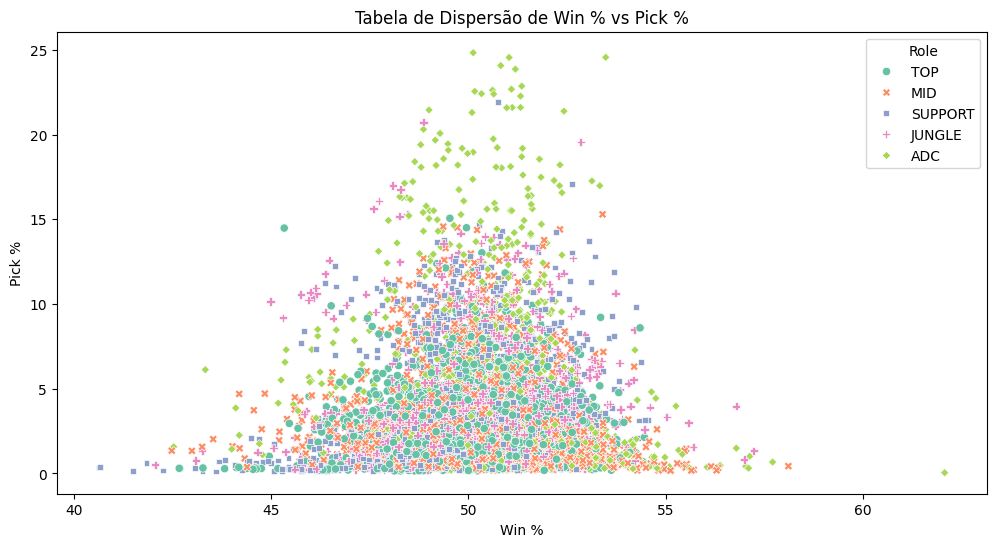

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv('Season12LeagueOfLegends.csv', delimiter=';')

# Converter colunas de porcentagem para float
percent_columns = ['Win %', 'Pick %', 'Ban %']
for col in percent_columns:
    df[col] = df[col].str.rstrip('%').astype('float')

# Criar a tabela de dispersão
plt.figure(figsize=(12, 6))

# Usar seaborn para criar a tabela de dispersão
sns.scatterplot(data=df, x='Win %', y='Pick %', hue='Role', style='Role', palette='Set2')

# Títulos e rótulos
plt.title('Tabela de Dispersão de Win % vs Pick %')
plt.xlabel('Win %')
plt.ylabel('Pick %')

# Exibir o gráfico
plt.show()


In [24]:
from sklearn import tree
import graphviz
import joblib

model = joblib.load('decision_tree_model.pkl')

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X.columns,  
                                class_names=model.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  

graph = graphviz.Source(dot_data)  

graph.render("decision_tree")

graph.view()


'decision_tree.pdf'